In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/books_dataset.csv")
df.head() #shows first 5 rows
#basic info about my data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         100 non-null    object 
 1   page_url      100 non-null    object 
 2   price         100 non-null    object 
 3   rating        100 non-null    object 
 4   availability  100 non-null    object 
 5   description   0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [ ]:
df.describe()


Index(['title', 'page_url', 'price', 'rating', 'availability', 'description'], dtype='object')

In [ ]:
df.shape


(100, 6)

In [ ]:
df.columns

Index(['title', 'page_url', 'price', 'rating', 'availability', 'description'], dtype='object')

In [ ]:
df.isnull().sum()

,0
title,0
page_url,0
price,0
rating,0
availability,0
description,100


In [ ]:
df['description'] = df['description'].astype('object').fillna('No description')



In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
df.head()

,title_A Light in the Attic,title_Aladdin and His Wonderful Lamp,title_America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana,title_Behind Closed Doors,title_Birdsong: A Story in Pictures,title_Black Dust,title_Chase Me (Paris Nights #2),"title_Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More",title_How Music Works,title_In Her Wake,...,price_Â£56.40,price_Â£56.41,price_Â£56.50,price_Â£57.25,price_Â£57.31,price_Â£58.11,rating_Four,rating_One,rating_Three,rating_Two
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create simple dataset manually
data_set = {
    'sqft_living': [650, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200],
    'price':       [90000, 120000, 150000, 170000, 190000, 210000, 240000, 270000, 320000]
}

home_data = pd.DataFrame(data_set)

print("Sample dataset created successfully!")
print(home_data)

X = home_data[['sqft_living']].values
Y = home_data['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

from sklearn.linear_model import LinearRegression
kashish= LinearRegression()
kashish.fit(X_train, y_train)

y_test_pred = kashish.predict(X_test)
Y_train_pred = kashish.predict(X_train)

#print model parameters and simple metrics
print("\nModel slope (coefficient):", kashish.coef_)
print("\nModel intercept:", kashish.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
print("\nTrain R^2:",r2_score(Y_train,Y_train_pred))
print("Test R^2:",r2_score(Y_test,Y_test_pred))
print("\nTrain MSE:",mean_squared_error(Y_train,Y_train_pred))

#visualize the training results with a sooth regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train,Y_train,label ="Training data",color='green')

#Create smooth line for regression
line_x = np.linspace(X.min(),X.max(),100).reshape(-1,1)
line_y = ananya.predict(line_x)
plt.plot(line_x,line_y,color='red',linewidth=2, label='Regression line')
plt.title('House Price vs Living Area (Training set)')
plt.xlabel('Living Area (sqrt)')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()


Sample dataset created successfully!
   sqft_living   price
0          650   90000
1          800  120000
2         1000  150000
3         1200  170000
4         1400  190000
5         1600  210000
6         1800  240000
7         2000  270000
8         2200  320000

Model slope (coefficient): [142.67968057]

Model intercept: -7119.195504288684


NameError: name 'Y_train' is not defined

In [ ]:
#implementation of knn

# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 2. Load your dataset
df = pd.read_csv('/content/books_dataset.csv')  # replace filename

# 3. Example: split into features and target
# change 'target_column' to your actual target column name
X = df.drop('target_column', axis=1)
y = df['target_column']

# 4. Handle categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# 5. Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 is default
knn.fit(X_train, y_train)

# 8. Make predictions
y_pred = knn.predict(X_test)

# 9. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KeyError: "['target_column'] not found in axis"

In [ ]:
#IMPLEMENT BAGGING
# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 2. Load dataset
df = pd.read_csv('/content/books_dataset.csv')  # change filename

# 3. Separate features and target
X = df.drop('availability', axis=1)
y = df['availability']



# 4. Handle categorical data if any
X = pd.get_dummies(X, drop_first=True)

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Create base model (weak learner)
base_model = DecisionTreeClassifier()

# 8. Create Bagging classifier using the base model
bag_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# 9. Train the Bagging model
bag_model.fit(X_train, y_train)

# 10. Predict on test set
y_pred = bag_model.predict(X_test)

# 11. Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[20]]
Classification Report:
               precision    recall  f1-score   support

    In stock       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
#IMPLEMENTING STACKING

# 1. Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# 3. Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Define base models (level-0)
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('log_reg', LogisticRegression(max_iter=1000))
]

# 5. Define meta-model (level-1)
meta_model = RandomForestClassifier(random_state=42)

# 6. Build Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# 7. Train the model
stack_model.fit(X_train, y_train)

# 8. Evaluate
y_pred = stack_model.predict(X_test)

# 9. Display results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# ADABOOST

# 1. Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Create base (weak) learner
base_learner = DecisionTreeClassifier(max_depth=1)  # simple stump

# 5. Create AdaBoost classifier
ada_model = AdaBoostClassifier(
    estimator=base_learner,  # base model
    n_estimators=50,         # number of weak learners
    learning_rate=1.0,       # controls contribution of each model
    random_state=42
)

# 6. Train the model
ada_model.fit(X_train, y_train)

# 7. Predict
y_pred = ada_model.predict(X_test)

# 8. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9707602339181286

Confusion Matrix:
 [[ 61   2]
 [  3 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
#XGBOOST

# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# 2. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Initialize the XGBoost model
model = XGBClassifier(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=3,           # depth of trees
    subsample=0.8,         # use 80% of data for each tree
    colsample_bytree=0.8,  # use 80% of features for each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss' # prevents warning for classification
)

# 5. Train model
model.fit(X_train, y_train)

# 6. Predict on test data
y_pred = model.predict(X_test)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:46:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Cluster Labels: [0 0 1]
Centroids:
 [[3. 2.]
 [6. 5.]]


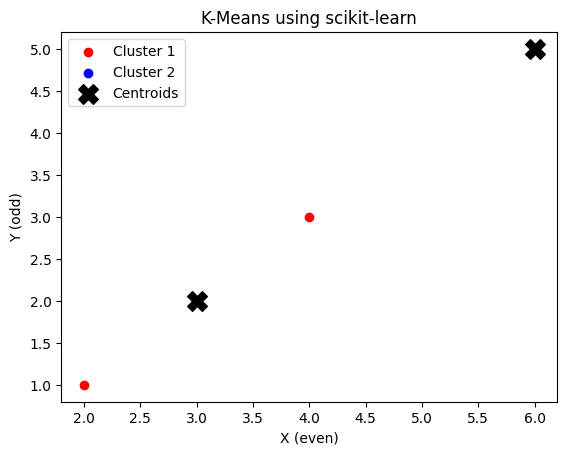

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Dataset (even x, odd y)
X = np.array([
    [2, 1],
    [4, 3],
    [6, 5]
])

# Create and fit KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)

# Get labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Centroids:\n", centroids)

# Plot
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title("K-Means using scikit-learn")
plt.xlabel("X (even)")
plt.ylabel("Y (odd)")
plt.legend()
plt.show()


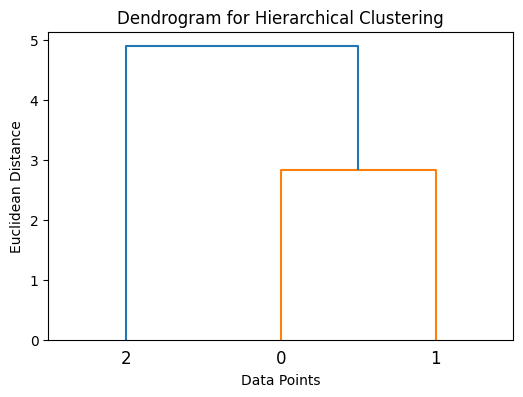

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dataset (even x, odd y)
X = np.array([
    [2, 1],
    [4, 3],
    [6, 5]
])

# Step 1: Create linkage matrix for dendrogram
Z = linkage(X, method='ward')

# Step 2: Plot dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 3: Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

# Step 4: Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("X (even)")
plt.ylabel("Y (odd)")
plt.show()

# Step 5: Output clusters
print("Cluster Labels:", labels)
